In [1]:
import matplotlib.pyplot as plt
import plotly as ply
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import missingno

In [2]:
df = pd.read_csv("./dati_polveri/polveri_emilia_PM10.csv")
df.head()

,02000003_005_202007.csv,COD_STAZ,ID_PARAM,DATA_INIZIO,DATA_FINE,VALORE,UM,Anno,Mese,Giorno,...,Mesenome,Stazione,COMUNE,INDIRIZZO,PROVINCIA,Altezza,PARAMETRO,TipoStazione,TipoArea,Zonizzazione
0,02000003_005_202007.txt,2000003,5,43831,43832,52,ug/m3,2020,1,1,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
1,02000003_005_202007.txt,2000003,5,43832,43833,59,ug/m3,2020,1,2,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
2,02000003_005_202007.txt,2000003,5,43833,43834,45,ug/m3,2020,1,3,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
3,02000003_005_202007.txt,2000003,5,43834,43835,42,ug/m3,2020,1,4,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
4,02000003_005_202007.txt,2000003,5,43835,43836,31,ug/m3,2020,1,5,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest


In [3]:
def string_date(anno,mese,giorno):
    return str(anno)+"-"+str(mese).zfill(2)+"-"+str(giorno).zfill(2)

In [4]:
#res = df[(df['Stazione']=='MARECCHIA')]
res = df[df['Anno'] == 2018].copy()
aux_df = res[['Anno','Mese', 'Giorno', 'Stazione', 'VALORE']].copy()

lista_date = aux_df.apply(lambda vec : string_date(vec[0],vec[1],vec[2]),axis=1).tolist()

final_df = res[['Stazione','VALORE','TipoStazione','TipoArea','Zonizzazione','Altezza','Mese']].copy()
final_df['Date'] = lista_date

final_df['Mese'].replace(to_replace=1, value='Gennaio', inplace=True)
final_df['Mese'].replace(to_replace=2, value='Febbraio', inplace=True)
final_df['Mese'].replace(to_replace=3, value='Marzo', inplace=True)
final_df['Mese'].replace(to_replace=4, value='Aprile', inplace=True)
final_df['Mese'].replace(to_replace=5, value='Maggio', inplace=True)
final_df['Mese'].replace(to_replace=6, value='Giugno', inplace=True)
final_df['Mese'].replace(to_replace=7, value='Luglio', inplace=True)
final_df['Mese'].replace(to_replace=8, value='Agosto', inplace=True)
final_df['Mese'].replace(to_replace=9, value='Settembre', inplace=True)
final_df['Mese'].replace(to_replace=10, value='Ottobre', inplace=True)
final_df['Mese'].replace(to_replace=11, value='Novembre', inplace=True)
final_df['Mese'].replace(to_replace=12, value='Dicembre', inplace=True)


final_df = final_df.sort_values(by=['Stazione','Date'])
final_df.head()

,Stazione,VALORE,TipoStazione,TipoArea,Zonizzazione,Altezza,Mese,Date
75727,BADIA,39,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-01
75728,BADIA,13,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-02
75729,BADIA,12,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-03
75730,BADIA,15,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-04
75731,BADIA,34,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-05


In [5]:
date_list = [datetime.date(2018,1,1)]
for i in range(1,365):
    date_list.append(datetime.date(2018,1,1) + datetime.timedelta(days=i))
    
#df_with_stations_as_cols = pd.DataFrame()
#df_with_stations_as_cols['Date'] = date_list
#df_with_stations_as_cols.tail()

aux_df = final_df.copy()
aux_df = aux_df.sort_values(by=['TipoArea'])
## Ordine: rurale, suburbano, urbano
aux_df = aux_df[['Stazione']]
aux_df.drop_duplicates(inplace=True)
aux_df = aux_df.reset_index()
aux_df = aux_df[['Stazione']]

N_stazioni = aux_df.size

matrix_with_stations_as_cols = np.empty((365,N_stazioni))
matrix_with_stations_as_cols[:] = np.nan
print(matrix_with_stations_as_cols.shape)

In [6]:
aux_df = final_df.copy()
aux_df = aux_df.sort_values(by=['Stazione'])
## Ordine: alfabetico
aux_df = aux_df[['Stazione']]
aux_df.drop_duplicates(inplace=True)
aux_df = aux_df.reset_index()
aux_df = aux_df[['Stazione']]

N_stazioni = aux_df.size

matrix_with_stations_as_cols = np.empty((365,N_stazioni))
matrix_with_stations_as_cols[:] = np.nan
print(matrix_with_stations_as_cols.shape)

(365, 49)


In [7]:
aux_df.head()

,Stazione
0,BADIA
1,BESENZONE
2,BOGOLESE
3,CAORLE
4,CASTELLARANO


In [8]:
primo_giorno = datetime.date(2018,1,1)

for stazione_idx in range(N_stazioni):
    #print(stazione[0])
    stazione = aux_df.values.tolist()[stazione_idx]
    staz_internal = stazione[0]
    df_solo_stazione = final_df[final_df['Stazione'] == staz_internal]
    
    for val in df_solo_stazione.values.tolist():
        giorno = datetime.date.fromisoformat(val[7])   
        giorno_idx = (giorno - primo_giorno).days        
        matrix_with_stations_as_cols[giorno_idx,stazione_idx] = val[1]
            

In [9]:
matrix_with_stations_as_cols

array([[39., nan, 46., ..., 48., 46., 43.],
       [13., nan, 25., ..., 20., 33., 29.],
       [12., nan, 26., ..., 17., 30., 30.],
       ...,
       [14., 38., 50., ..., 32., 47., 48.],
       [19., 49., 54., ..., 39., 61., 58.],
       [nan, nan, nan, ..., nan, nan, nan]])

In [10]:
lista_stazioni = []
for val in aux_df.values.tolist():
    lista_stazioni.append(val[0])

df_with_stations_as_cols = pd.DataFrame(matrix_with_stations_as_cols, columns = lista_stazioni, index = date_list)

In [11]:
df_with_stations_as_cols

,BADIA,BESENZONE,BOGOLESE,CAORLE,CASTELLARANO,CASTELLUCCIO,CENO,CENTO,CITTADELLA,CORTE BRUGNATELLA,...,SAN LEO,SAN PIETRO CAPOFIUME,SARAGAT,SAVIGNANO,SAVIGNANO DI RIGO,TIMAVO,VERUCCHIO,VIA CHIARINI,VILLA FULVIA,ZALAMELLA
2018-01-01,39.0,NaN,46.0,48.0,50.0,4.0,42.0,49.0,53.0,10.0,...,13.0,40.0,NaN,45.0,12.0,62.0,25.0,48.0,46.0,43.0
2018-01-02,13.0,NaN,25.0,30.0,17.0,3.0,22.0,27.0,25.0,4.0,...,7.0,23.0,NaN,21.0,3.0,40.0,12.0,20.0,33.0,29.0
2018-01-03,12.0,NaN,26.0,25.0,14.0,0.0,30.0,25.0,22.0,5.0,...,0.0,21.0,31.0,17.0,2.0,36.0,6.0,17.0,30.0,30.0
2018-01-04,15.0,NaN,30.0,40.0,21.0,0.0,32.0,34.0,29.0,3.0,...,5.0,28.0,34.0,41.0,5.0,37.0,21.0,26.0,37.0,42.0
2018-01-05,34.0,NaN,43.0,56.0,47.0,4.0,49.0,50.0,48.0,13.0,...,13.0,37.0,40.0,55.0,7.0,53.0,45.0,46.0,53.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,19.0,36.0,26.0,23.0,32.0,8.0,39.0,24.0,34.0,8.0,...,NaN,23.0,30.0,23.0,8.0,34.0,NaN,30.0,31.0,27.0
2018-12-28,16.0,40.0,42.0,43.0,23.0,5.0,59.0,45.0,45.0,6.0,...,NaN,40.0,50.0,47.0,7.0,57.0,NaN,29.0,50.0,44.0
2018-12-29,14.0,38.0,50.0,48.0,22.0,8.0,57.0,61.0,48.0,4.0,...,12.0,44.0,51.0,51.0,10.0,56.0,24.0,32.0,47.0,48.0
2018-12-30,19.0,49.0,54.0,57.0,23.0,7.0,53.0,62.0,51.0,5.0,...,16.0,51.0,60.0,62.0,11.0,57.0,33.0,39.0,61.0,58.0


<AxesSubplot: >

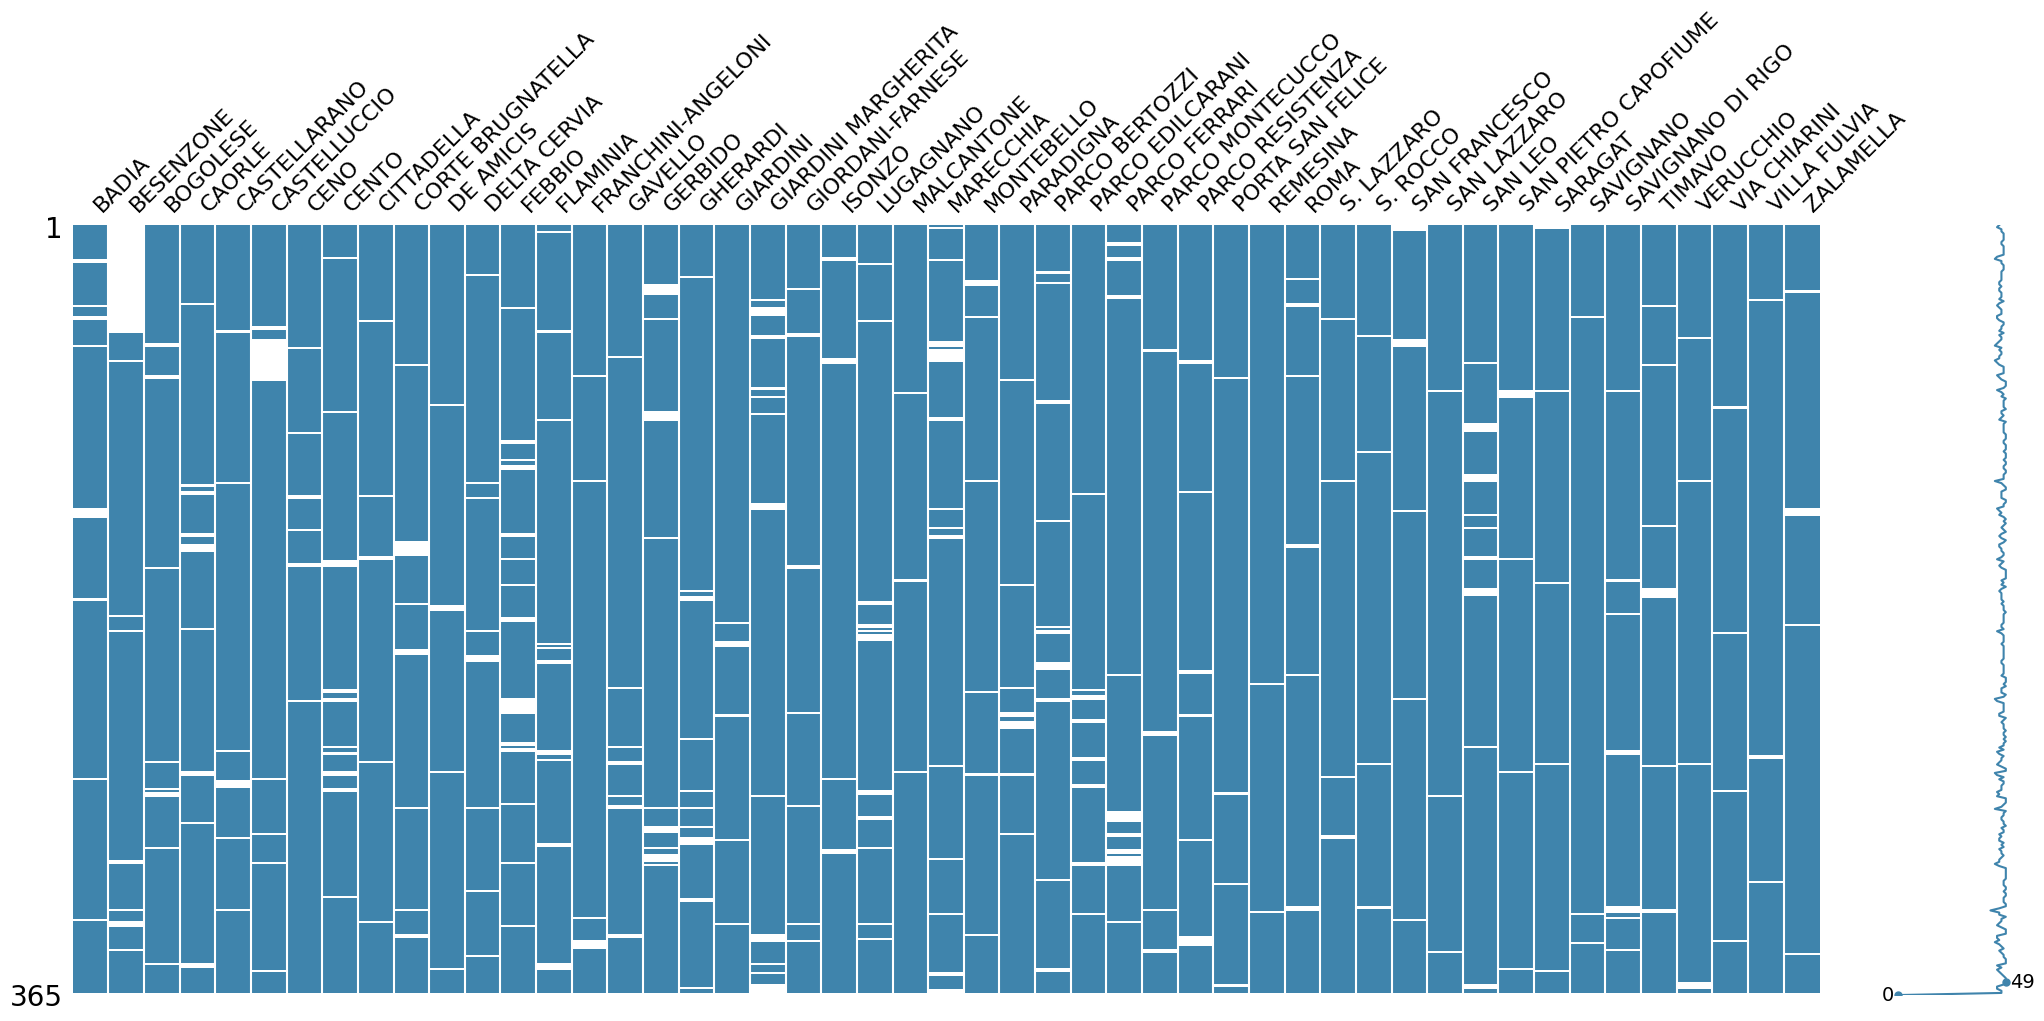

In [12]:
%matplotlib inline
missingno.matrix(df_with_stations_as_cols, color=(63/255,132/255,172/255))

<AxesSubplot: >

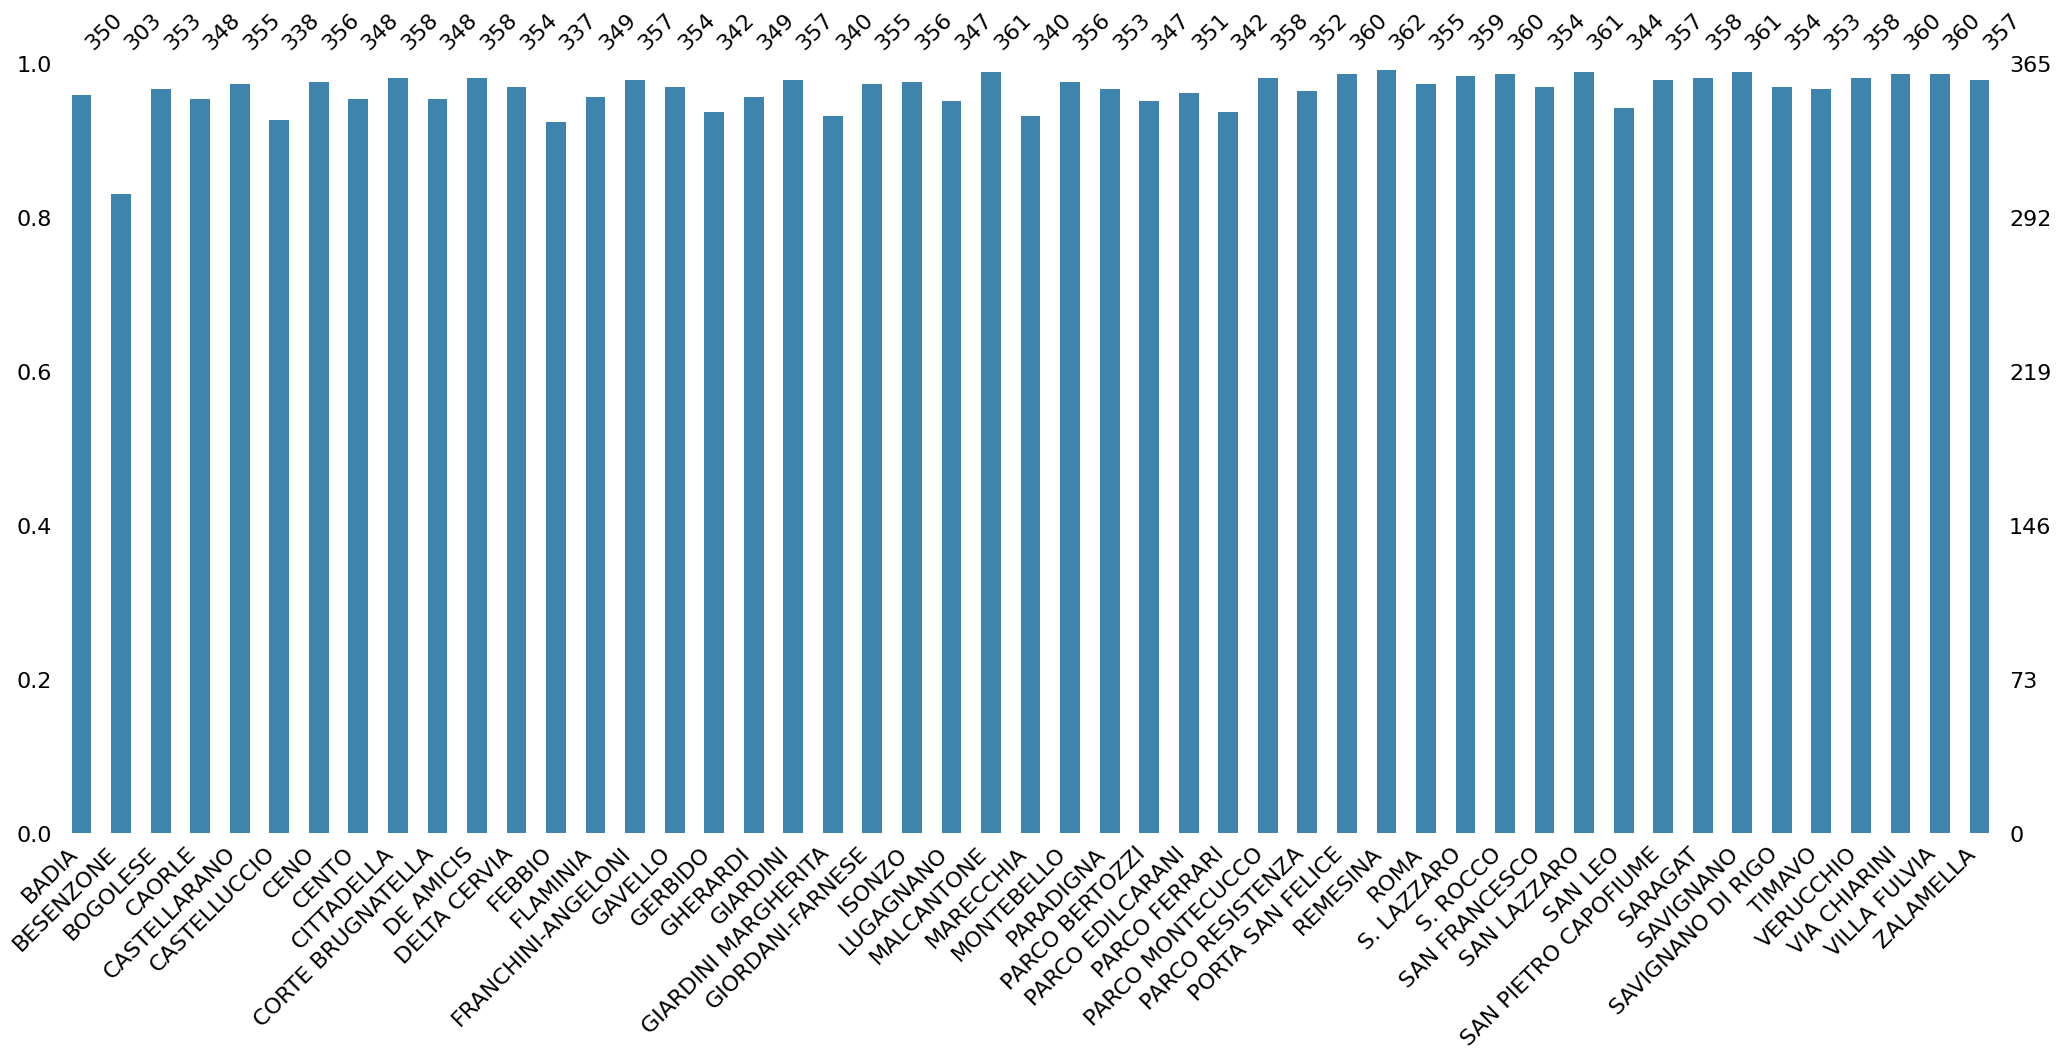

In [13]:
missingno.bar(df_with_stations_as_cols, color=(63/255,132/255,172/255))

<AxesSubplot: >

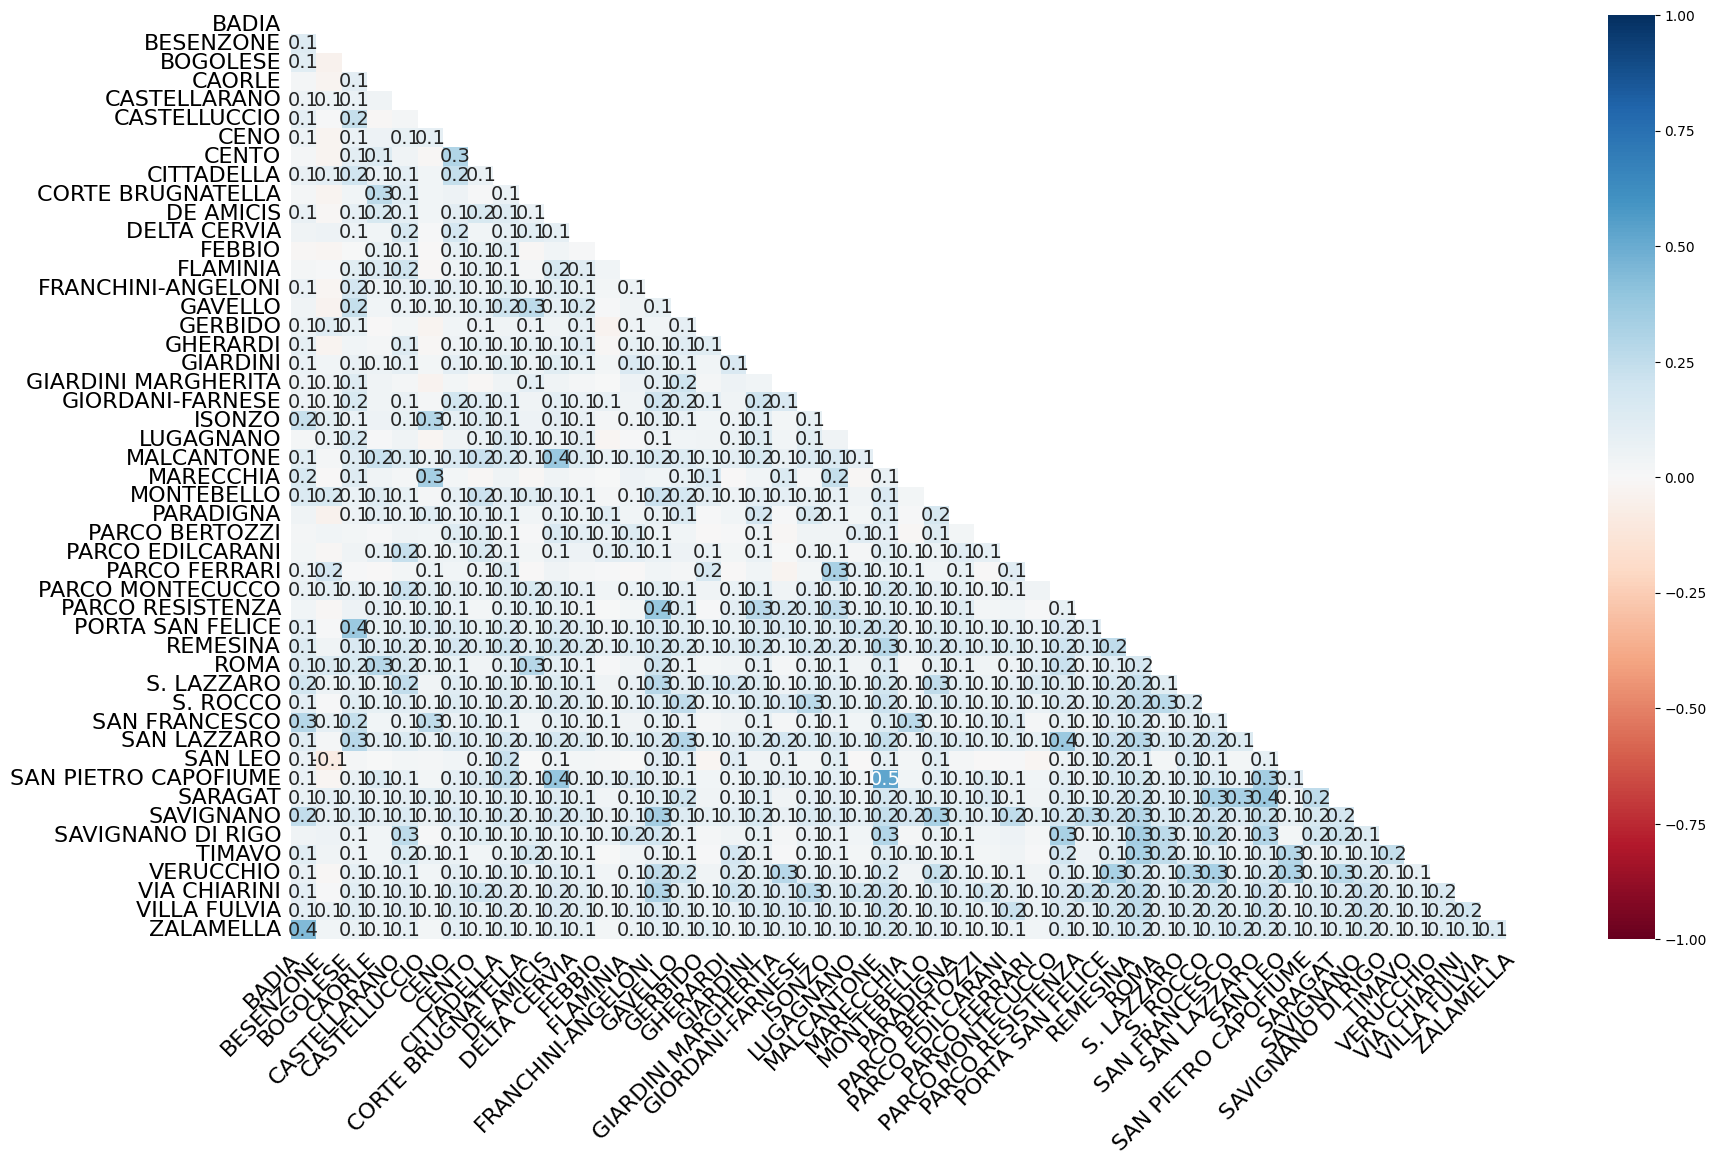

In [14]:
missingno.heatmap(df_with_stations_as_cols)

In [15]:
aux_df = final_df.copy()
aux_df = aux_df[aux_df['TipoArea'] == 'Rurale']
aux_df = aux_df[['Stazione']]
aux_df.drop_duplicates(inplace=True)

lista_stazioni_rurali = []
for val in aux_df.values.tolist():
    lista_stazioni_rurali.append(val[0])

In [16]:
aux_df = final_df.copy()
aux_df = aux_df[aux_df['TipoArea'] == 'Suburbano']
aux_df = aux_df[['Stazione']]
aux_df.drop_duplicates(inplace=True)

lista_stazioni_suburbane = []
for val in aux_df.values.tolist():
    lista_stazioni_suburbane.append(val[0])

In [17]:
aux_df = final_df.copy()
aux_df = aux_df[aux_df['TipoArea'] == 'Urbano']
aux_df = aux_df[['Stazione']]
aux_df.drop_duplicates(inplace=True)

lista_stazioni_urbane = []
for val in aux_df.values.tolist():
    lista_stazioni_urbane.append(val[0])

In [18]:
lista_stazioni_non_rurali = lista_stazioni_urbane + lista_stazioni_suburbane

In [19]:
print(lista_stazioni_rurali)
print(lista_stazioni_suburbane)
print(lista_stazioni_urbane)
print(lista_stazioni_non_rurali)

['BADIA', 'BESENZONE', 'CASTELLUCCIO', 'CORTE BRUGNATELLA', 'FEBBIO', 'GAVELLO', 'GHERARDI', 'MALCANTONE', 'S. ROCCO', 'SAN LEO', 'SAN PIETRO CAPOFIUME', 'SAVIGNANO DI RIGO']
['BOGOLESE', 'CASTELLARANO', 'CENO', 'CENTO', 'DELTA CERVIA', 'GERBIDO', 'LUGAGNANO', 'PARADIGNA', 'REMESINA', 'SAN FRANCESCO', 'SARAGAT', 'SAVIGNANO', 'VERUCCHIO', 'VIA CHIARINI']
['CAORLE', 'CITTADELLA', 'DE AMICIS', 'FLAMINIA', 'FRANCHINI-ANGELONI', 'GIARDINI', 'GIARDINI MARGHERITA', 'GIORDANI-FARNESE', 'ISONZO', 'MARECCHIA', 'MONTEBELLO', 'PARCO BERTOZZI', 'PARCO EDILCARANI', 'PARCO FERRARI', 'PARCO MONTECUCCO', 'PARCO RESISTENZA', 'PORTA SAN FELICE', 'ROMA', 'S. LAZZARO', 'SAN LAZZARO', 'TIMAVO', 'VILLA FULVIA', 'ZALAMELLA']
['CAORLE', 'CITTADELLA', 'DE AMICIS', 'FLAMINIA', 'FRANCHINI-ANGELONI', 'GIARDINI', 'GIARDINI MARGHERITA', 'GIORDANI-FARNESE', 'ISONZO', 'MARECCHIA', 'MONTEBELLO', 'PARCO BERTOZZI', 'PARCO EDILCARANI', 'PARCO FERRARI', 'PARCO MONTECUCCO', 'PARCO RESISTENZA', 'PORTA SAN FELICE', 'ROMA', 'S

<AxesSubplot: >

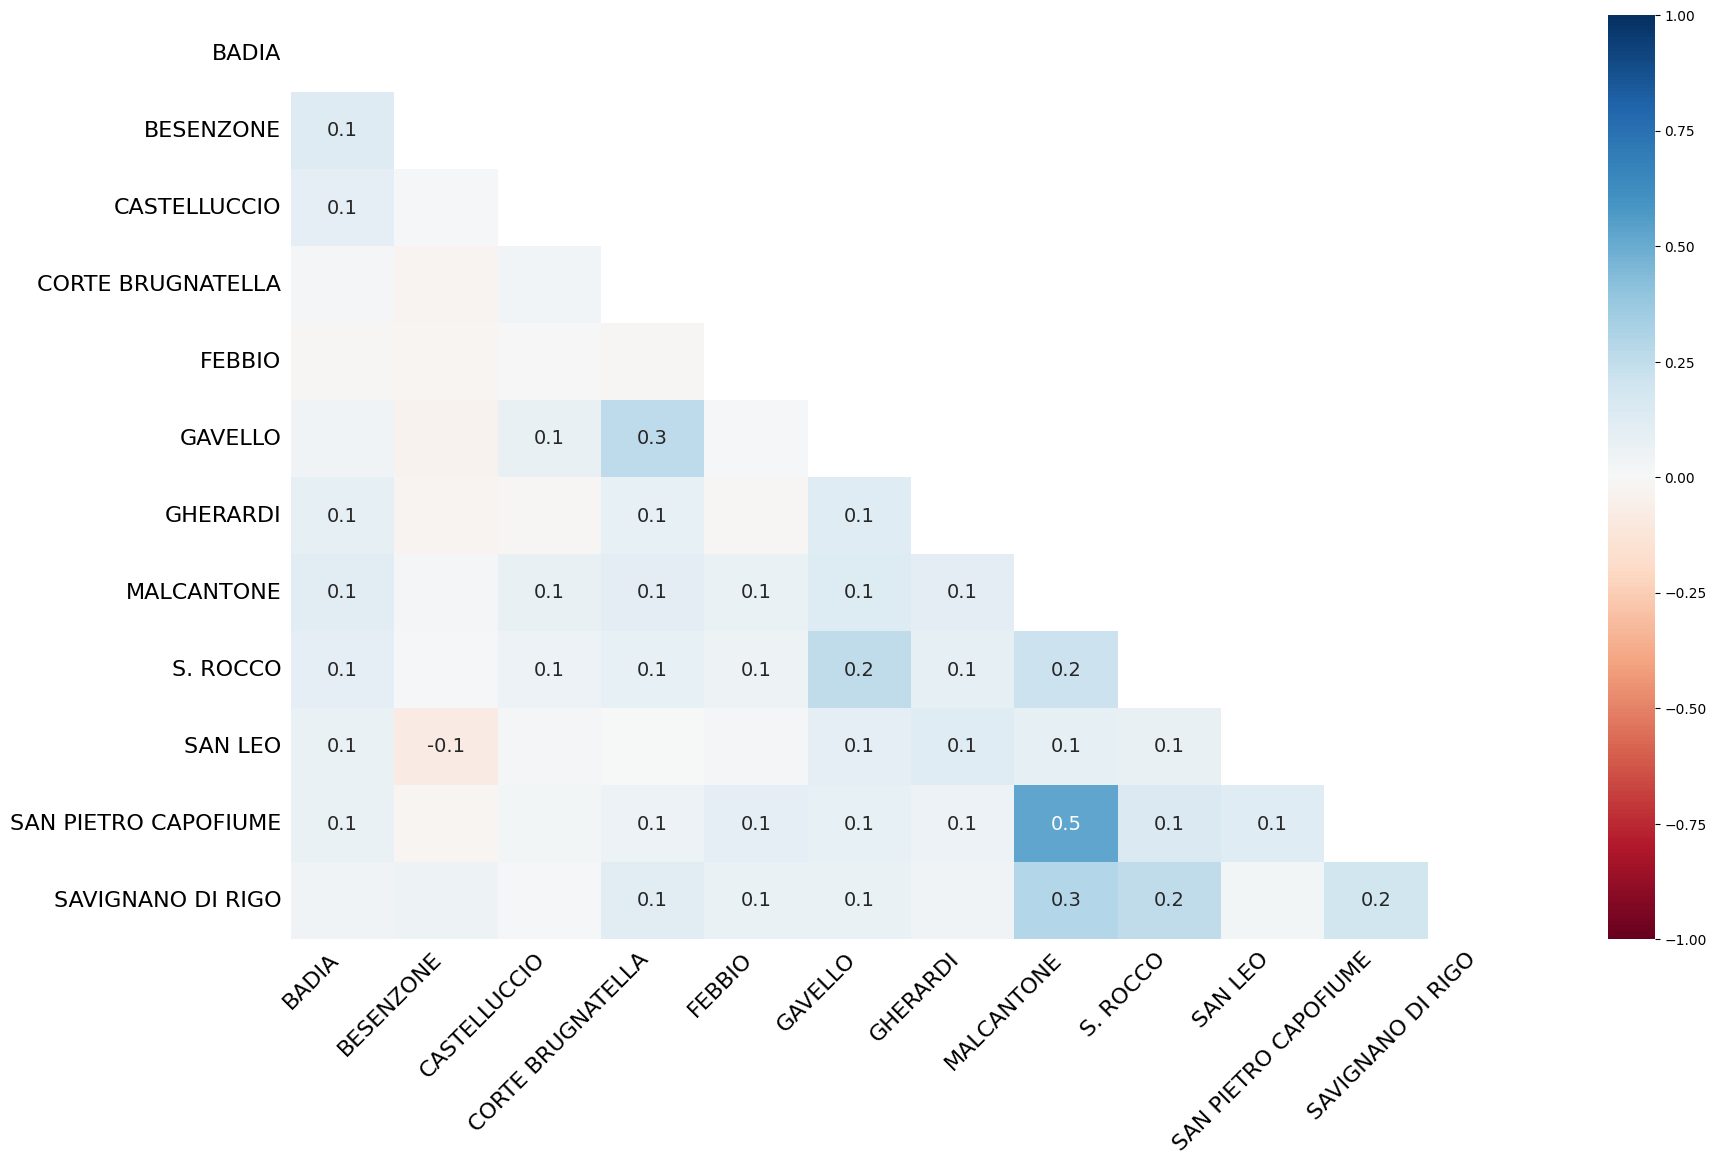

In [20]:
missingno.heatmap(df_with_stations_as_cols[lista_stazioni_rurali])

<AxesSubplot: >

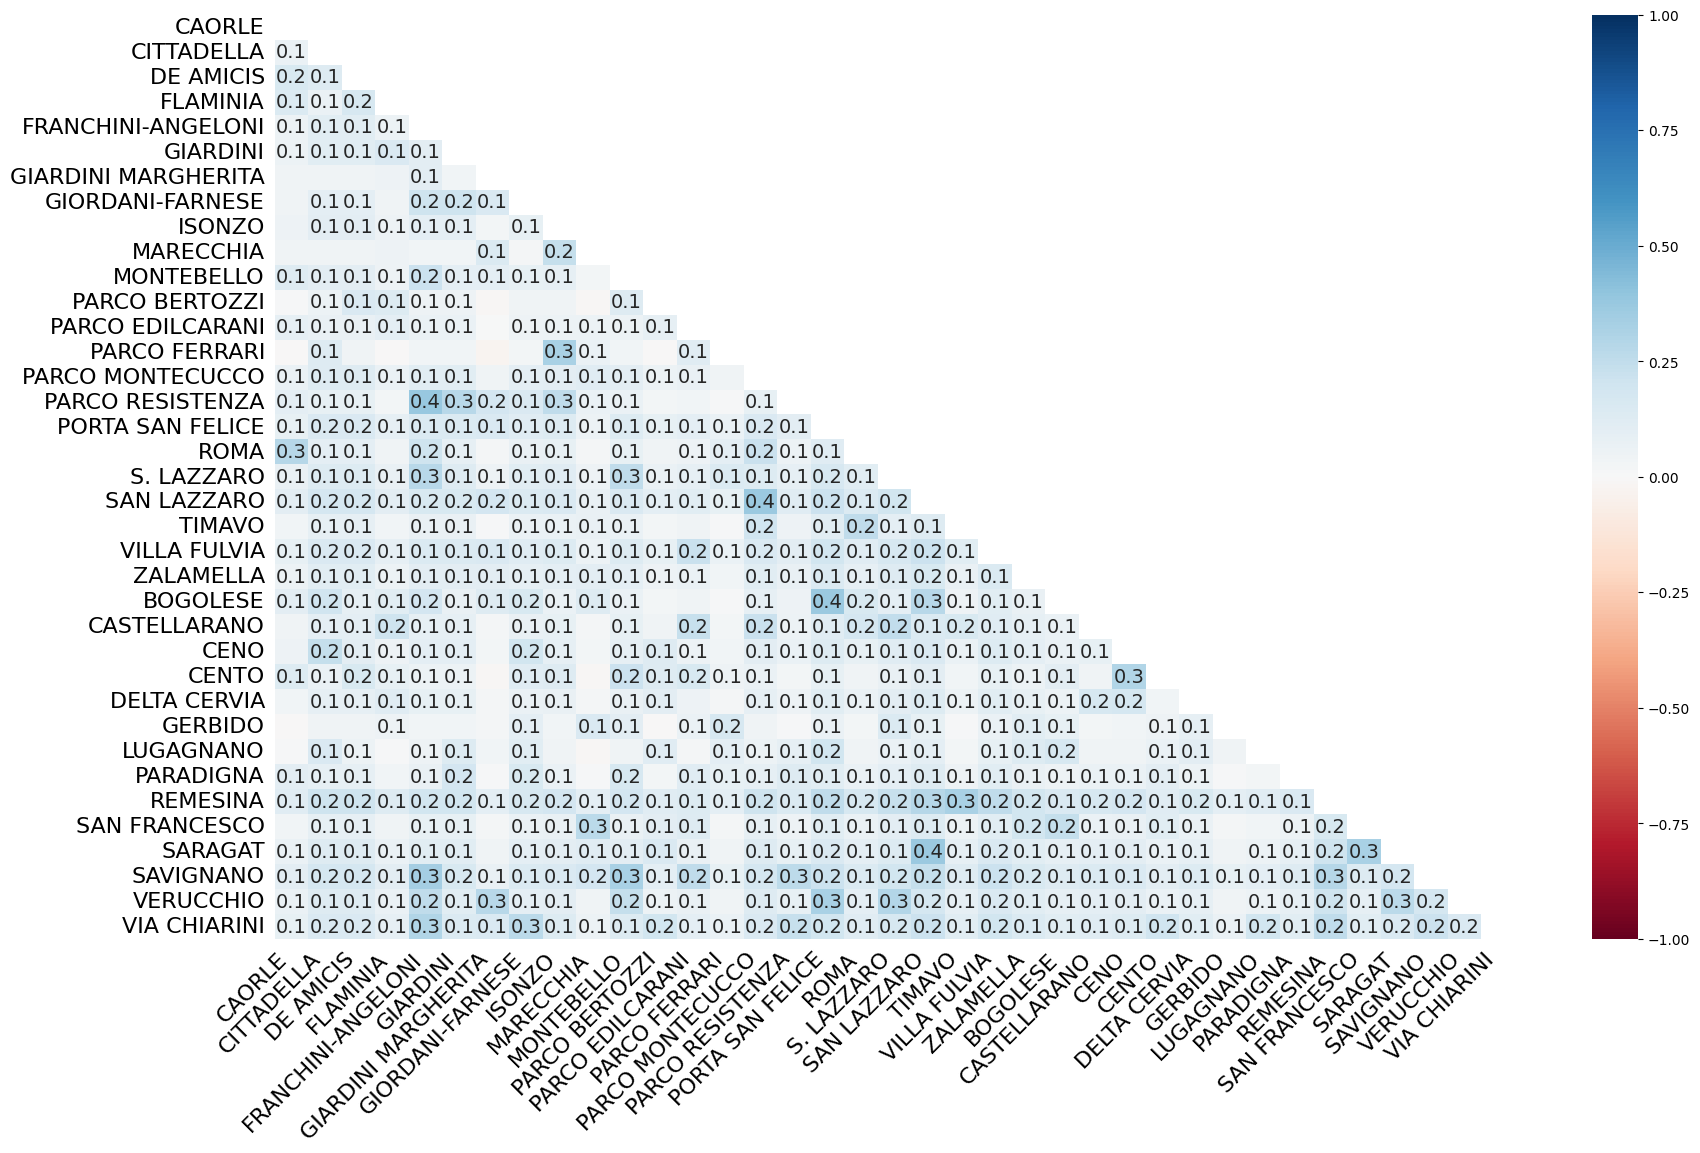

In [21]:
missingno.heatmap(df_with_stations_as_cols[lista_stazioni_non_rurali])

In [22]:
aux_df = final_df.copy()
aux_df = aux_df.sort_values(by=['Stazione'])
## Ordine: alfabetico
aux_df = aux_df[['Stazione']]
aux_df.drop_duplicates(inplace=True)
aux_df = aux_df.reset_index()
aux_df = aux_df[['Stazione']]

N_stazioni = aux_df.size

matrix_with_stations_as_cols = np.zeros((365,N_stazioni))
print(matrix_with_stations_as_cols.shape)

(365, 49)


In [23]:
primo_giorno = datetime.date(2018,1,1)

for stazione_idx in range(N_stazioni):
    #print(stazione[0])
    stazione = aux_df.values.tolist()[stazione_idx]
    staz_internal = stazione[0]
    df_solo_stazione = final_df[final_df['Stazione'] == staz_internal]
    
    for val in df_solo_stazione.values.tolist():
        giorno = datetime.date.fromisoformat(val[7])   
        giorno_idx = (giorno - primo_giorno).days        
        matrix_with_stations_as_cols[giorno_idx,stazione_idx] += 1
            

In [24]:
matrix_with_stations_as_cols

array([[1., 0., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
np.argwhere(matrix_with_stations_as_cols > 1)

array([], shape=(0, 2), dtype=int64)

### Quindi non ci sono dati ripetuti (?)